### The Exploratory Data Analysis 

**Exploratory Data Analysis (EDA)** is an analysis approach that identifies general patterns in the data. These patterns include outliers and features of the data that might be unexpected. 

In [1]:
import pandas as pd

### Joining


In [5]:
df1 = pd.read_csv('bank_churn_prediction.csv')
df2 = pd.read_csv('churn.csv')
### merge two dataframe
df = pd.merge(df1,df2,how='inner',on='customer_id')


#### Remember: All data has stories to tell.

### Discovering

In [7]:
df.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [10]:
df.tail()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
9995,15606229,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,15569892,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,15584532,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,15682355,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,15628319,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


In [8]:
df.shape # check 

(10000, 12)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


In [12]:
df['churn'].describe()

count    10000.000000
mean         0.203700
std          0.402769
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: churn, dtype: float64

In [15]:
df_zero = df[df['churn']==0]

In [16]:
df_one = df[df['churn']==1]

In [25]:
df_final  = pd.concat([df_one, df_zero.sample(n = 2037)])

In [28]:
df_final.reset_index(drop=True)

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
2,15574012,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
3,15656148,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
4,15737452,653,Germany,Male,58,1,132602.88,1,1,0,5097.67,1
...,...,...,...,...,...,...,...,...,...,...,...,...
4069,15690452,605,France,Male,52,1,63349.75,1,1,0,108887.44,0
4070,15774872,663,France,Male,36,10,0.00,2,1,0,136349.55,0
4071,15595588,773,Spain,Female,39,4,0.00,2,0,1,182081.45,0
4072,15658211,559,Spain,Female,39,2,0.00,2,1,1,121151.10,0


In [32]:
df_final.set_index('customer_id')

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
customer_id,,,,,,,,,,,
15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
15574012,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
15656148,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
15737452,653,Germany,Male,58,1,132602.88,1,1,0,5097.67,1
...,...,...,...,...,...,...,...,...,...,...,...
15690452,605,France,Male,52,1,63349.75,1,1,0,108887.44,0
15774872,663,France,Male,36,10,0.00,2,1,0,136349.55,0
15595588,773,Spain,Female,39,4,0.00,2,0,1,182081.45,0


In [41]:
df_final['churn'].replace({0:'No',
                          1:'Yes'}, inplace=True)

In [42]:
import seaborn as sns

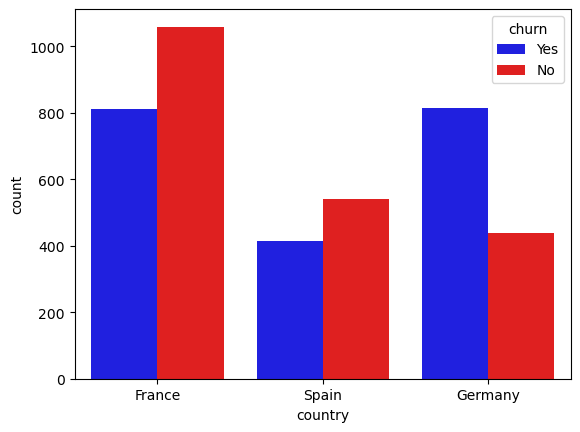

In [47]:
import numpy as np
sns.countplot(data = df_final, x = df_final['country'], hue = df_final['churn'],palette=['b', 'r'] );

In [ ]:
#### 2037 

In [13]:
df['churn'].value_counts()

churn
0    7963
1    2037
Name: count, dtype: int64

### Validating

### Structuring

### Cleaning

In [51]:
df[df['estimated_salary']<=1000]

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
149,15794413,416,France,Male,32,0,0.00,2,0,1,878.87,0
195,15594815,807,France,Male,35,3,174790.15,1,1,1,600.36,0
393,15684548,556,Spain,Male,38,8,0.00,2,0,0,417.41,1
396,15584766,557,France,Male,33,3,54503.55,1,1,1,371.05,0
559,15571816,850,Spain,Female,70,5,0.00,1,1,1,705.18,0
925,15636731,714,Germany,Female,36,1,101609.01,2,1,1,447.73,0
932,15634141,708,Germany,Female,42,8,192390.52,2,1,0,823.36,0
982,15792360,668,France,Male,32,7,0.00,2,1,1,777.37,0
1139,15569247,727,Spain,Female,57,1,109679.72,1,0,1,753.37,0
1451,15684198,551,France,Female,38,10,0.00,2,1,1,216.27,0


In [49]:
df['estimated_salary'].describe()

count     10000.000000
mean     100090.239881
std       57510.492818
min          11.580000
25%       51002.110000
50%      100193.915000
75%      149388.247500
max      199992.480000
Name: estimated_salary, dtype: float64

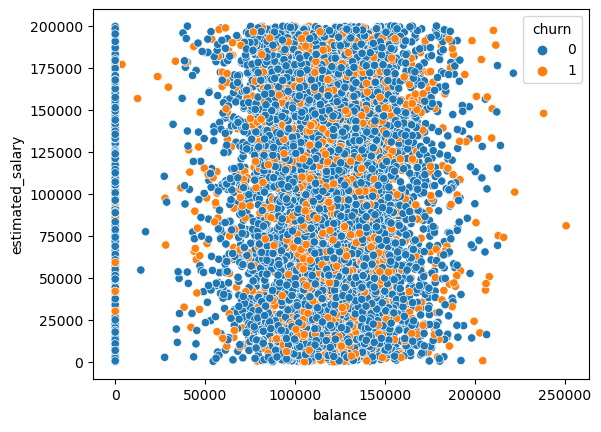

In [56]:
sns.scatterplot(x = df['balance'], y = df['estimated_salary'], hue = df['churn']);

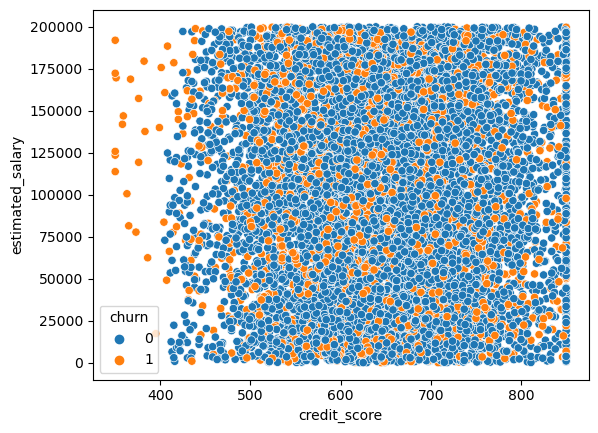

In [55]:
sns.scatterplot(x = df['credit_score'], y = df['estimated_salary'], hue = df['churn']);

In [57]:
df['balance'].describe()

count     10000.000000
mean      76485.889288
std       62397.405202
min           0.000000
25%           0.000000
50%       97198.540000
75%      127644.240000
max      250898.090000
Name: balance, dtype: float64

In [60]:
import matplotlib.pyplot as plt, numpy as np


In [66]:
fig, ax = plt.subplots(figsize = (12, 4))
ax.set_xticks(np.arange(0, 26*(10**4)))
sns.boxplot(x = df['balance']);

KeyboardInterrupt: 

Error in callback <function _draw_all_if_interactive at 0x309470ea0> (for post_execute), with arguments args (),kwargs {}:


KeyboardInterrupt: 

Error in callback <function flush_figures at 0x306653060> (for post_execute), with arguments args (),kwargs {}:


KeyboardInterrupt: 

In [ ]:
sns.boxplot(x = df['estimated_salary']);

### Presentation

You share your dataset with a peer